In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from plotBoundary import *
import pylab as pl
%matplotlib inline

In [16]:
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.autolayout'] = 'true'

In [3]:
train = np.loadtxt('data/data3_train.csv')
X = train[:,0:2]
Y = train[:,2:3]
X = np.concatenate((np.ones([400,1]), X), axis=1)

In [4]:
def run_pegasos(L):
    w = np.zeros(len(X[0]))
    step_size = 1e-1
    max_epochs = 200
    t = 0
    for epoch in range(max_epochs):
        for i in range(len(X)):
            t += 1
            step_size = 1/(t*L)
            multiplier = np.array([1.]+[1.-step_size*L for j in range(len(w)-1)])
            w *= multiplier
            if Y[i]*(w.dot(X[i])) < 1:
                w += step_size*Y[i]*X[i]
    return w

In [12]:
def predictor(w):
    def predict_linearSVM(x):
        return w[0] + w[1:].dot(x)
    return predict_linearSVM

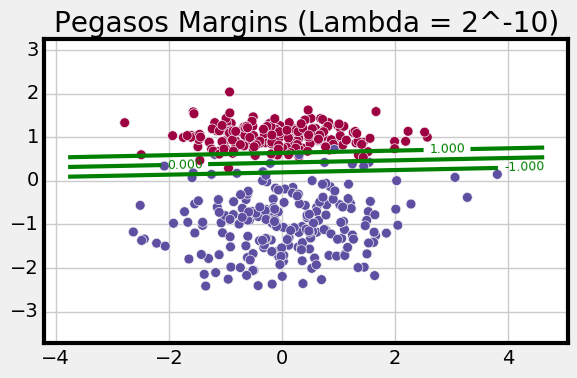

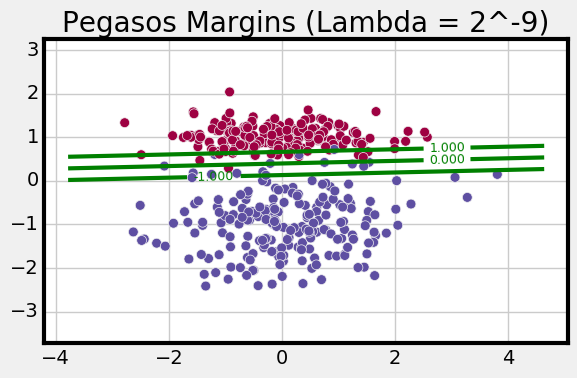

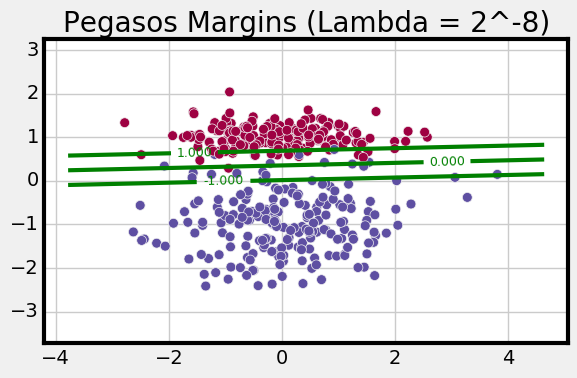

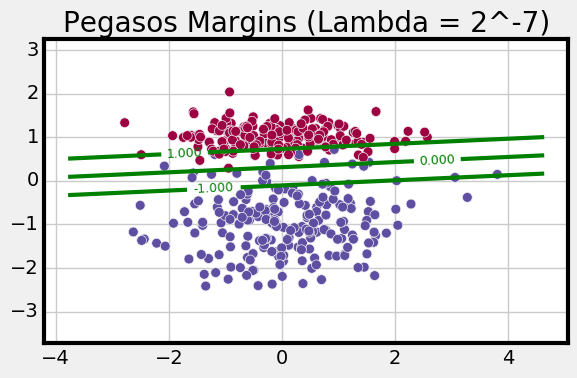

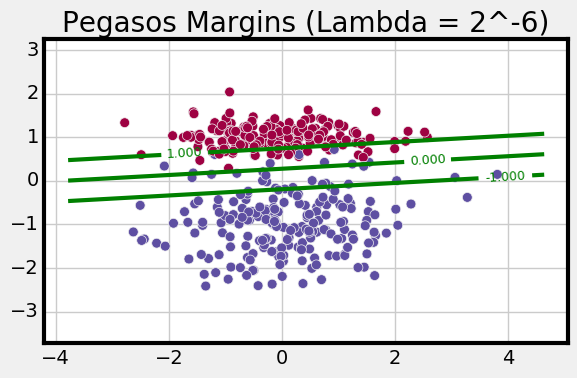

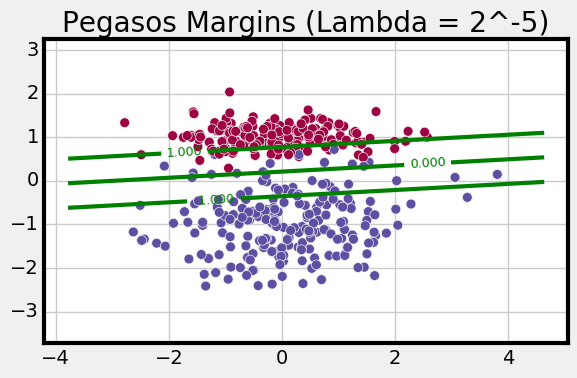

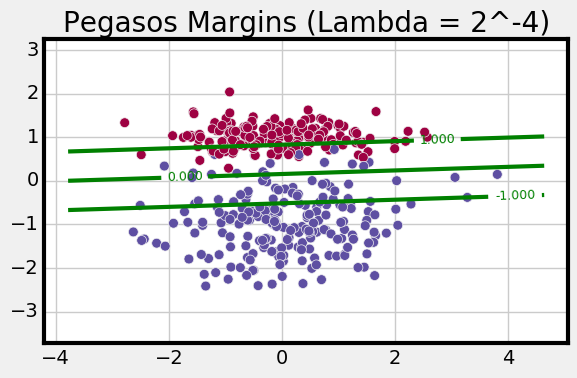

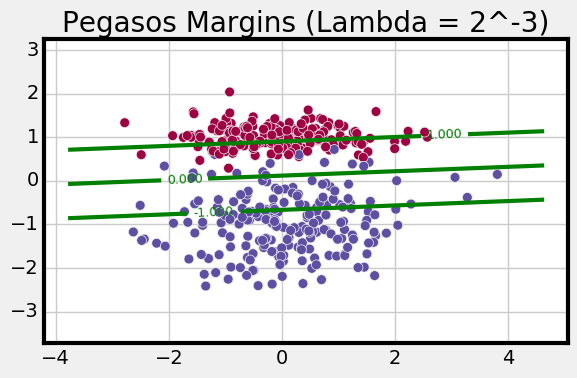

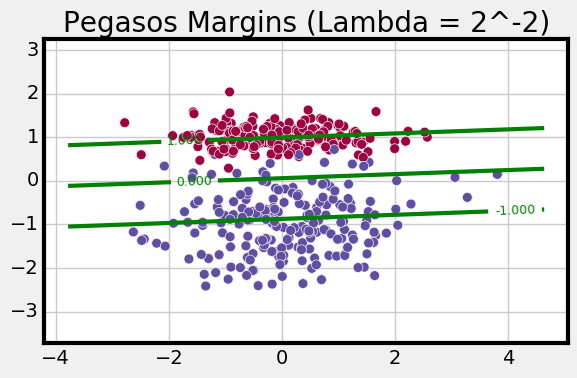

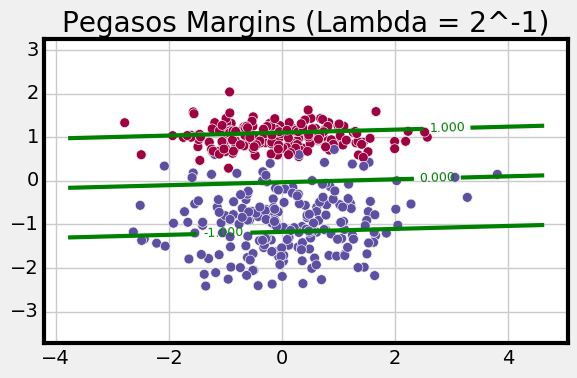

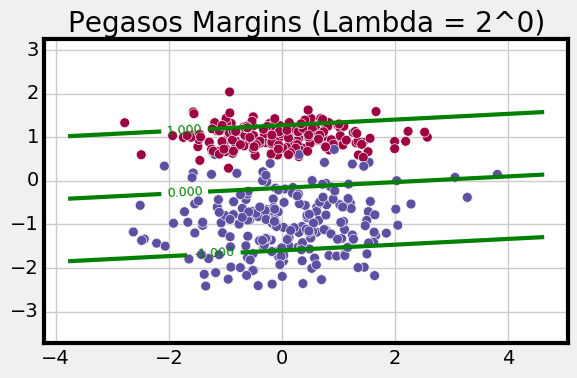

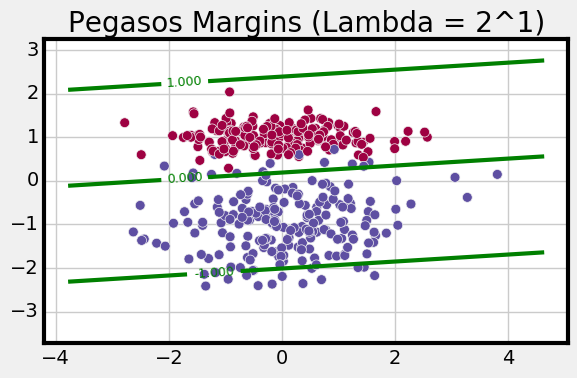

In [25]:
L_arr = 2.0**np.array(range(-10,2))
margin = []
for i,L in enumerate(L_arr):
    w = run_pegasos(L)
    plotDecisionBoundary(X[:,1:], Y, predictor(w), [-1,0,1], title = 'Pegasos Margins (Lambda = 2^'+str(i-10)+')')
    margin.append(1.0/np.linalg.norm(w))
    pl.show()

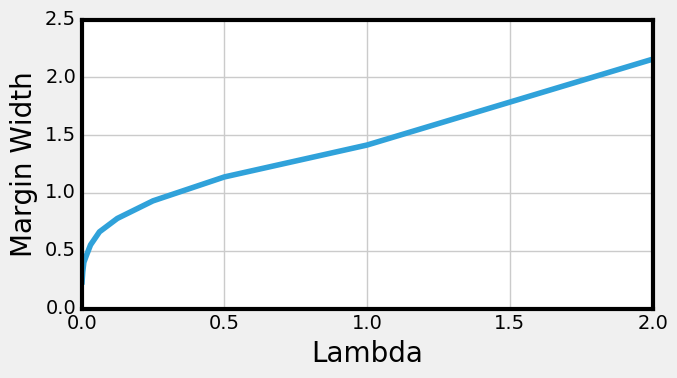

In [30]:
plt.figure(figsize=(7,4))
plt.plot(L_arr, margin)
plt.xlabel('Lambda', fontsize=20)
plt.ylabel('Margin Width', fontsize=20)
plt.show()

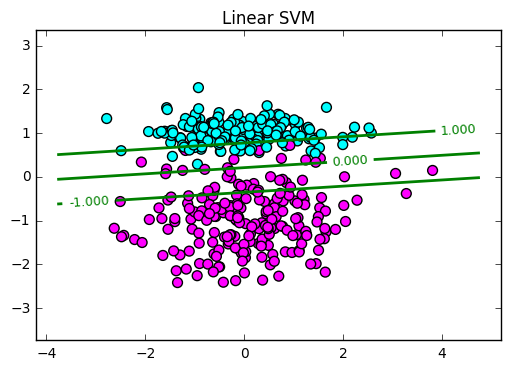

In [14]:
plotDecisionBoundary(X[:,1:], Y, predict_linearSVM, [-1,0,1], title = 'Linear SVM')
pl.show()

In [27]:
L_arr[[0,4,8,11]]

array([  9.76562500e-04,   1.56250000e-02,   2.50000000e-01,
         2.00000000e+00])